# Lecture Dataset

Dépot git des travaux effectués sur les datasets SWAT & WADI : https://github.com/elisejiuqizhang/USAD-on-WADI-and-SWaT

Lien de telechargement datasets : 

    SWAT : 
    - normal : https://drive.google.com/file/d/1rVJ5ry5GG-ZZi5yI4x9lICB8VhErXwCw/view
    - attack : https://drive.google.com/open?id=1iDYc0OEmidN712fquOBRFjln90SbpaE7
Version Python utilisé : python 3.8.10

Les version des bibliothèques utilisées se trouvent dans le fichier `Requirements/requirement_0.txt` ou `Requirements/requirement_1.txt` . 

Travaux de références : UNSW-NB15
Source : https://github.com/SubrataMaji/IDS-UNSW-NB15/tree/master


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from sklearn.model_selection import train_test_split


# 1. Read data

In [23]:
! tree ../data

../data
├── SWaT_Dataset_Attack_v0.csv
└── SWaT_Dataset_Normal_v1.csv

0 directories, 2 files


## - Normal

Récuperation des données du dataset sans attaques.

In [24]:

normal = pd.read_csv("../data/SWaT_Dataset_Normal_v1.csv",sep = ",",low_memory=False)
# suppression de la colonne Timestamp
normal = normal.drop(["Timestamp"] , axis = 1)
normal.shape

(495000, 52)

In [25]:
"""
#source git

# Transform all columns into float64
for i in list(normal): 
    if i not in ["Normal/Attack", "Timestamp"]:
        normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
#normal = normal.astype(float)
cols_to_convert = normal.columns.difference(["Normal/Attack"])  # Exclure la colonne "Normal/Attack"
normal[cols_to_convert] = normal[cols_to_convert].astype(float)
"""

'\n#source git\n\n# Transform all columns into float64\nfor i in list(normal): \n    if i not in ["Normal/Attack", "Timestamp"]:\n        normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))\n#normal = normal.astype(float)\ncols_to_convert = normal.columns.difference(["Normal/Attack"])  # Exclure la colonne "Normal/Attack"\nnormal[cols_to_convert] = normal[cols_to_convert].astype(float)\n'

In [26]:
normal.head(), normal.columns.tolist()

(  FIT101    LIT101  MV101  P101  P102    AIT201    AIT202    AIT203 FIT201  \
 0      0  124,3135      1     1     1  251,9226  8,313446  312,7916      0   
 1      0   124,392      1     1     1  251,9226  8,313446  312,7916      0   
 2      0  124,4705      1     1     1  251,9226  8,313446  312,7916      0   
 3      0  124,6668      1     1     1  251,9226  8,313446  312,7916      0   
 4      0  124,5098      1     1     1  251,9226  8,313446  312,7916      0   
 
    MV201  ...  P501  P502    PIT501  PIT502  PIT503        FIT601 P601 P602  \
 0      1  ...     1     1  9,100231       0  3,3485  0,0002563035    1    1   
 1      1  ...     1     1  9,100231       0  3,3485  0,0002563035    1    1   
 2      1  ...     1     1  9,100231       0  3,3485  0,0002563035    1    1   
 3      1  ...     1     1  9,100231       0  3,3485  0,0002563035    1    1   
 4      1  ...     1     1  9,100231       0  3,3485  0,0002563035    1    1   
 
   P603  Normal/Attack  
 0    1         N

In [27]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 52 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   FIT101         495000 non-null  object
 1   LIT101         495000 non-null  object
 2   MV101          495000 non-null  int64 
 3   P101           495000 non-null  int64 
 4   P102           495000 non-null  int64 
 5   AIT201         495000 non-null  object
 6   AIT202         495000 non-null  object
 7   AIT203         495000 non-null  object
 8   FIT201         495000 non-null  object
 9   MV201          495000 non-null  int64 
 10  P201           495000 non-null  int64 
 11  P202           495000 non-null  int64 
 12  P203           495000 non-null  int64 
 13  P204           495000 non-null  int64 
 14  P205           495000 non-null  int64 
 15  P206           495000 non-null  int64 
 16  DPIT301        495000 non-null  object
 17  FIT301         495000 non-null  object
 18  LIT3

## - Attack

Récupération des données du dataset avec des attaques.

In [28]:
attack = pd.read_csv("../data/SWaT_Dataset_Attack_v0.csv",low_memory=False, sep=";")
attack = attack.drop(["Timestamp"] , axis = 1)

In [29]:
attack.shape

(449919, 52)

In [30]:
attack.head()


,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,"2,427057","522,8467",2,2,1,"262,0161","8,396437","328,6337","2,445391",2,...,2,1,"250,8652","1,649953","189,5988","0,000128152",1,1,1,Normal
1,"2,446274","522,886",2,2,1,"262,0161","8,396437","328,6337","2,445391",2,...,2,1,"250,8652","1,649953","189,6789","0,000128152",1,1,1,Normal
2,"2,489191","522,8467",2,2,1,"262,0161","8,394514","328,6337","2,442316",2,...,2,1,"250,8812","1,649953","189,6789","0,000128152",1,1,1,Normal
3,"2,53435","522,9645",2,2,1,"262,0161","8,394514","328,6337","2,442316",2,...,2,1,"250,8812","1,649953","189,6148","0,000128152",1,1,1,Normal
4,"2,56926","523,4748",2,2,1,"262,0161","8,394514","328,6337","2,443085",2,...,2,1,"250,8812","1,649953","189,5027","0,000128152",1,1,1,Normal


# 2. Analysis

### 2.1 Combinaison des deux csv

In [31]:
# vérification si ils ont les memes colonnes
if set(normal.columns) == set(attack.columns):
    print("On a les mêmes colonnes sur les deux fichiers.")
else:
    print("On n'a pas les mêmes colonnes !!")
    print("_________normal__________")
    print(normal.columns)
    print("_________attack__________")
    print(attack.columns)

On a les mêmes colonnes sur les deux fichiers.


In [32]:
# combinaison des deux csv
if normal.columns.equals(attack.columns):
    # Concaténer les deux DataFrames
    combined = pd.concat([normal, attack], ignore_index=True)
    print("Les DataFrames ont été combinés avec succès !")
else:
    print("Les colonnes des deux DataFrames ne sont pas identiques.")


Les DataFrames ont été combinés avec succès !


In [33]:
combined.columns

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack'],
      dtype='object')

In [34]:
combined.shape

(944919, 52)

In [35]:
combined.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,0,"124,3135",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
1,0,"124,392",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
2,0,"124,4705",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
3,0,"124,6668",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
4,0,"124,5098",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal


### 2.2 Combien on a d'attaque et de normal ?

In [36]:
count_values = combined['Normal/Attack'].value_counts()
count_values

Normal     890298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

In [37]:
combined.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,0,"124,3135",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
1,0,"124,392",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
2,0,"124,4705",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
3,0,"124,6668",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
4,0,"124,5098",1,1,1,"251,9226","8,313446","312,7916",0,1,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal


In [38]:
# correction de A ttack en Attack
combined['Normal/Attack'] = combined['Normal/Attack'].replace({'A ttack': 'Attack'})
count_values = combined['Normal/Attack'].value_counts()
count_values

Normal    890298
Attack     54621
Name: Normal/Attack, dtype: int64

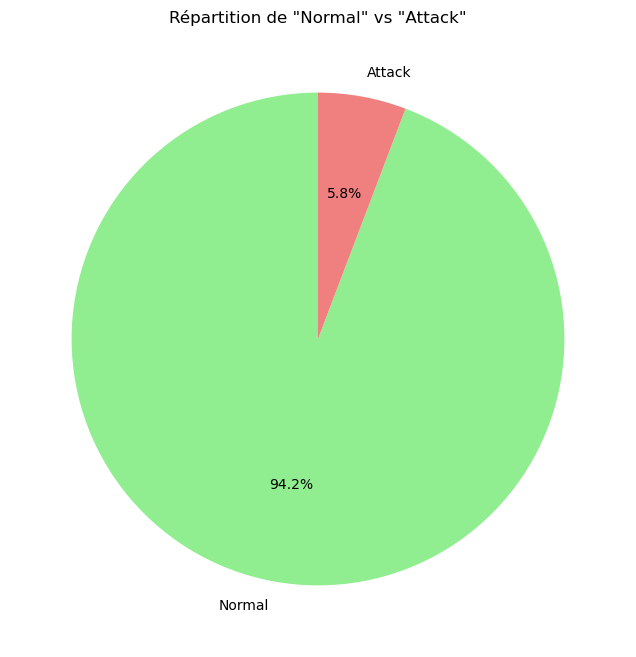

In [39]:
#Affichage
plt.figure(figsize=(8, 8))
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Répartition de "Normal" vs "Attack"')
plt.show()

### 2.3 Correlation

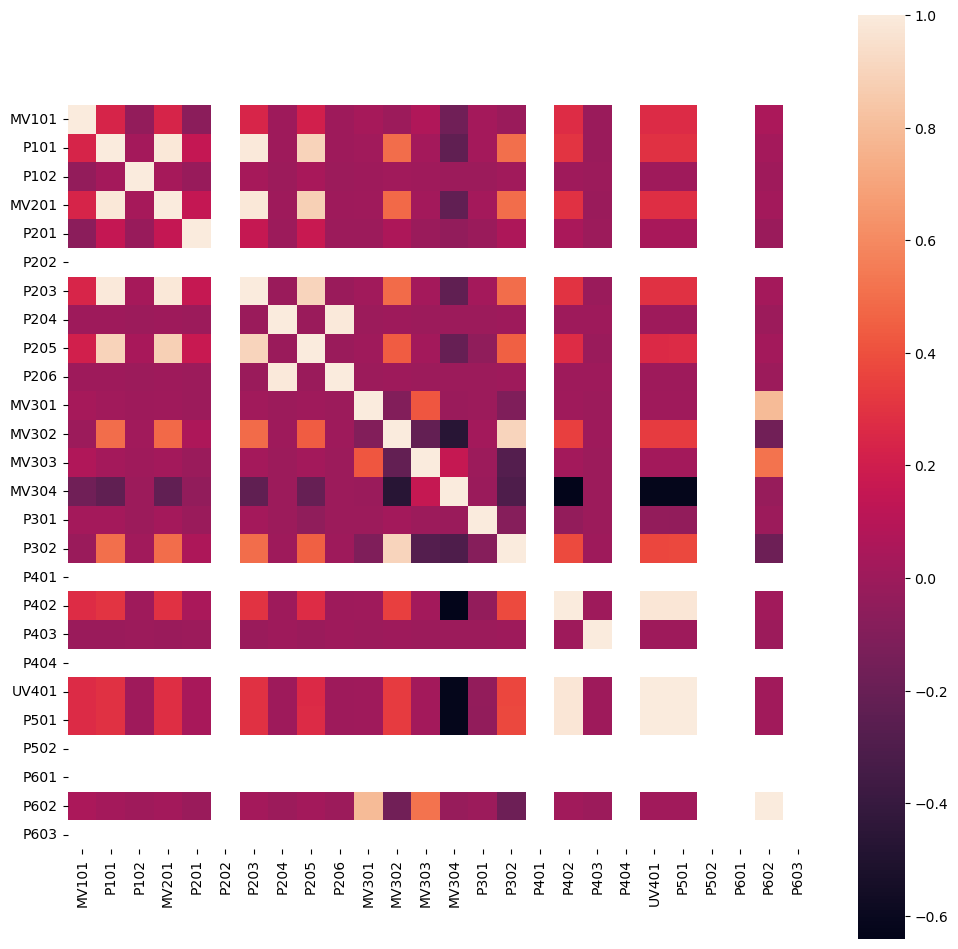

In [40]:
corr_matrix = combined.corr(method= "pearson")
plt.figure(figsize=(12, 12))  
sns.heatmap(corr_matrix,square=True)
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

In [41]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_matrix.columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_matrix.iloc[i, j]}")


P101                 MV201                0.9867743963170607
P101                 P203                 0.9917319053102396
MV201                P203                 0.9812199691686654
P204                 P206                 0.991030684534372
MV302                P302                 0.9003637381665688
P402                 UV401                0.9800483158602863
P402                 P501                 0.9789810432214828
UV401                P501                 0.9987942181205025


## corr_matrix = combined.corr(method= "pearson")
plt.figure(figsize=(12, 12))  
sns.heatmap(corr_matrix,square=True)
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

Les features où, on a le plus de correlation : 
P101,                 MV201                
P101,                P203                 
MV201,                P203                 
P204,                 P206                 
MV302,                P302                 
P402,                 UV401                
P402,                 P501                 
UV401,                P501                 

In [42]:
#combined.isna().sum()

In [43]:
combined.nunique() 

FIT101            3953
LIT101           11457
MV101                3
P101                 2
P102                 2
AIT201            2331
AIT202            1724
AIT203            6868
FIT201            4989
MV201                3
P201                 2
P202                 1
P203                 2
P204                 2
P205                 2
P206                 2
DPIT301           5180
FIT301            8281
LIT301           11176
MV301                3
MV302                3
MV303                3
MV304                3
P301                 2
P302                 2
AIT401              37
AIT402            4127
FIT401             920
LIT401           14444
P401                 1
P402                 2
P403                 2
P404                 1
UV401                2
AIT501            1680
AIT502            3469
AIT503            1123
AIT504             492
FIT501             986
FIT502            1518
FIT503             468
FIT504             291
P501                 2
P502       

Sur les colonnes blanches, on n'a pas de corrélation. Car ils ont des valeurs uniques.\
P202, P401, P404, P502, P601, P603

In [44]:
single_value_columns = combined.columns[combined.nunique() == 1]

# Afficher la liste des colonnes avec une seule valeur unique
print("Colonnes avec une seule valeur unique :")
print(single_value_columns)

Colonnes avec une seule valeur unique :
Index(['P202', 'P401', 'P404', 'P502', 'P601', 'P603'], dtype='object')


### 2.3.1 Supprimer les features avec les hautes correlations

In [45]:
corr_matrix = combined.corr().abs()
# Select upper triangle of correlation matrix
#modif np.bool => bool
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['MV201', 'P203', 'P206', 'UV401', 'P501']


In [46]:
#Suppression ici 
combined_2 =combined
combined = combined.drop(["MV201", "P203", "P206", "UV401", "P501" ] , axis = 1)
print("Drop fini")

Drop fini


## Modification des données

On associera 'Normal' => '0' et 'Attack' => '1' 

In [47]:
#Labelisation
combined['Normal/Attack'] = combined['Normal/Attack'].replace({'Normal': 0, 'Attack': 1})


Pour cette partie , on a plusieur type object. Mais ils se présentent comme ceci : 2,427377 \
On ira remplacer ',' par '.' puis les convertir en float.\

In [48]:
# correction de 2,427377(object) => 2.427377(float) 
# Remplacer les virgules par des points dans toutes les colonnes de type 'object'
combined = combined.apply(lambda col: col.str.replace(',', '.') if col.dtype == 'object' else col)

# Convertir toutes les colonnes de type 'object' en float
#combined = combined.apply(lambda col: col.astype(float) if col.dtype == 'object' else col)
# 
combined = combined.astype(float)

In [49]:
#Vérification 
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944919 entries, 0 to 944918
Data columns (total 47 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIT101         944919 non-null  float64
 1   LIT101         944919 non-null  float64
 2   MV101          944919 non-null  float64
 3   P101           944919 non-null  float64
 4   P102           944919 non-null  float64
 5   AIT201         944919 non-null  float64
 6   AIT202         944919 non-null  float64
 7   AIT203         944919 non-null  float64
 8   FIT201         944919 non-null  float64
 9   P201           944919 non-null  float64
 10  P202           944919 non-null  float64
 11  P204           944919 non-null  float64
 12  P205           944919 non-null  float64
 13  DPIT301        944919 non-null  float64
 14  FIT301         944919 non-null  float64
 15  LIT301         944919 non-null  float64
 16  MV301          944919 non-null  float64
 17  MV302          944919 non-nul

In [50]:
combined.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,P201,...,FIT504,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,0.0,124.3135,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
1,0.0,124.3920,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
2,0.0,124.4705,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
3,0.0,124.6668,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
4,0.0,124.5098,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0


## Séparer les data pour train et test

In [51]:
normal_data = combined[combined['Normal/Attack'] == 0]
attack_data = combined[combined['Normal/Attack'] == 1]

# Prendre seulement 54584 exemples de 'Normal'
normal_data = normal_data.sample(n=54584, random_state=42)

# Concatenate les données 'Normal' et 'Attack' pour avoir un échantillon équilibré
# 50% Normal, 50% Attack
balanced_data = pd.concat([normal_data, attack_data])

# Séparer le jeu de données en train et test (80% train, 20% test)
train_data, test_data = train_test_split(balanced_data, test_size=0.2, stratify=balanced_data['Normal/Attack'], random_state=42)

In [52]:
# Afficher les tailles des ensembles train et test
print(f"Taille du train: {train_data.shape[0]}")
print(f"Taille du test: {test_data.shape[0]}")

# Afficher la distribution dans les deux ensembles
print("\nDistribution dans le train:")
print(train_data['Normal/Attack'].value_counts())

print("\nDistribution dans le test:")
print(test_data['Normal/Attack'].value_counts())

Taille du train: 87364
Taille du test: 21841

Distribution dans le train:
1.0    43697
0.0    43667
Name: Normal/Attack, dtype: int64

Distribution dans le test:
1.0    10924
0.0    10917
Name: Normal/Attack, dtype: int64


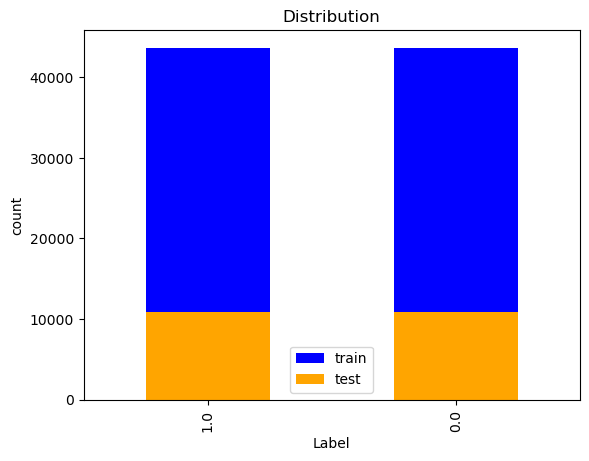

In [53]:
# Plotting target label distribution


plt.figure()
plt.title("Distribution")
train_data['Normal/Attack'].value_counts().plot(kind="bar", color='b', label="train")
test_data['Normal/Attack'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Label")
plt.ylabel("count")
plt.legend()
plt.show()


In [54]:
## Dataset pour le clustering
# on n'a pas besoin d'avoir les mêmes nombres de 1 et 0

# Séparer le jeu de données en train et test (80% train, 20% test)
train_data_clust, test_data_clust = train_test_split(combined, test_size=0.2, stratify=combined['Normal/Attack'], random_state=42)

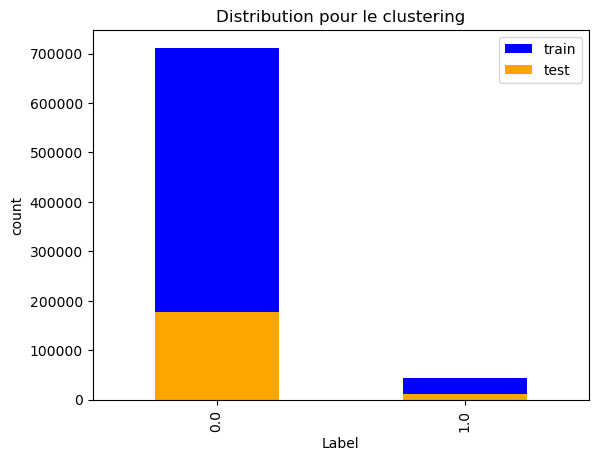

In [55]:
# Plotting target label distribution


plt.figure()
plt.title("Distribution pour le clustering")
train_data_clust['Normal/Attack'].value_counts().plot(kind="bar", color='b', label="train")
test_data_clust['Normal/Attack'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Label")
plt.ylabel("count")
plt.legend()
plt.show()

## Sauver les données

In [56]:
train_data_clust.to_csv('./train_data_clust.csv',sep=';', index=False)
test_data_clust.to_csv('./test_data_clust.csv',sep=';', index=False)

train_data.to_csv('./train_data.csv',sep=';', index=False)
test_data.to_csv('./test_data.csv',sep=';', index=False)

combined.to_csv('./combined.csv',sep=';', index=False)


In [57]:
print(pd.__version__)

1.4.3


In [58]:
# pour les test sur cartes

#Labelisation
combined_2['Normal/Attack'] = combined_2['Normal/Attack'].replace({'Normal': 0, 'Attack': 1})
combined_2 = combined_2.apply(lambda col: col.str.replace(',', '.') if col.dtype == 'object' else col)
combined_2 = combined_2.astype(float)
combined_2.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,0.0,124.3135,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,1.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
1,0.0,124.3920,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,1.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
2,0.0,124.4705,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,1.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
3,0.0,124.6668,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,1.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0
4,0.0,124.5098,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.0,1.0,...,1.0,1.0,9.100231,0.0,3.3485,0.000256,1.0,1.0,1.0,0.0


In [59]:
normal_2 = combined_2[combined_2['Normal/Attack'] == 0.0].sample(n=10, random_state=1)
attack_2 = combined_2[combined_2['Normal/Attack'] == 1.0].sample(n=10, random_state=1)
attack_2.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
744070,0.0,813.7489,1.0,1.0,1.0,192.9313,8.581646,355.2935,0.0,1.0,...,1.0,1.0,10.013460,0.0,3.652910,0.0,1.0,1.0,1.0,1.0
734557,0.0,813.8275,1.0,1.0,1.0,192.9633,8.605999,338.0415,0.0,1.0,...,1.0,1.0,10.189700,0.0,3.797103,0.0,1.0,1.0,1.0,1.0
742034,0.0,814.2200,1.0,1.0,1.0,192.8993,8.584850,352.2430,0.0,1.0,...,1.0,1.0,9.981415,0.0,3.733017,0.0,1.0,1.0,1.0,1.0
756957,0.0,812.9639,1.0,1.0,1.0,197.2892,8.524929,369.2130,0.0,1.0,...,1.0,1.0,9.628942,0.0,3.316457,0.0,1.0,1.0,1.0,1.0
736987,0.0,814.0237,1.0,1.0,1.0,193.2517,8.600231,343.2453,0.0,1.0,...,1.0,1.0,10.061520,0.0,3.829146,0.0,1.0,1.0,1.0,1.0


## Transformation en liste
Cette partie est utilisé pour récupérer des features pour du test sur carte.

In [60]:
# Liste des valeurs de la colonne 'Normal/Attack'
normal_attack_list = normal_2['Normal/Attack'].tolist()

# Liste des autres colonnes
other_columns_list = normal_2.drop(columns=['Normal/Attack']).values.tolist()

# Affichage des listes
print("Liste 'Normal/Attack':", normal_attack_list)
print("Liste des autres colonnes:", other_columns_list)

Liste 'Normal/Attack': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Liste des autres colonnes: [[2.535311, 511.4634, 2.0, 2.0, 1.0, 265.5089, 8.347411, 329.0695, 2.441803, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 19.68756, 2.218749, 921.4785, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 148.8128, 158.2158, 1.738891, 889.5411, 1.0, 2.0, 1.0, 1.0, 2.0, 7.88535, 145.5012, 271.8213, 13.41964, 1.75314, 1.332266, 0.7307877, 0.3045831, 2.0, 1.0, 246.6675, 1.169384, 186.0581, 0.0, 1.0, 1.0, 1.0], [2.649329, 496.2726, 2.0, 2.0, 1.0, 266.4701, 8.347411, 336.324, 2.4559, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 20.13573, 2.212984, 838.0063, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 148.8032, 172.648, 1.69737, 892.6942, 1.0, 2.0, 1.0, 1.0, 2.0, 7.874135, 164.7783, 265.7011, 11.07408, 1.706998, 1.259255, 0.7435906, 0.3104122, 2.0, 1.0, 254.8705, 1.169384, 193.7484, 0.0, 1.0, 1.0, 1.0], [2.505845, 797.7731, 2.0, 1.0, 1.0, 258.1389, 8.422071, 324.4553, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.288879, 0.0, 1010.078, 1.0, 1.0, 1.0, 1

In [61]:
# Liste des valeurs de la colonne 'Normal/Attack'
normal_attack_list = attack_2['Normal/Attack'].tolist()

# Liste des autres colonnes
other_columns_list = attack_2.drop(columns=['Normal/Attack']).values.tolist()

# Affichage des listes
print("Liste 'Normal/Attack':", normal_attack_list)
print("Liste des autres colonnes:", other_columns_list)

Liste 'Normal/Attack': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Liste des autres colonnes: [[0.0, 813.7489, 1.0, 1.0, 1.0, 192.9313, 8.581646, 355.2935, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.010372, 0.0, 1014.724, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 148.808, 332.2738, 0.0, 247.5135, 1.0, 1.0, 1.0, 1.0, 1.0, 7.509485, 222.9428, 268.1684, 15.49603, 0.000897206, 0.001152812, 0.000896201, 0.0, 1.0, 1.0, 10.01346, 0.0, 3.65291, 0.0, 1.0, 1.0, 1.0], [0.0, 813.8275, 1.0, 1.0, 1.0, 192.9633, 8.605999, 338.0415, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.000768, 0.0, 1015.565, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 148.8032, 325.6345, 0.0, 248.1287, 1.0, 1.0, 1.0, 1.0, 1.0, 7.599526, 247.3212, 267.1751, 15.34222, 0.000897206, 0.001152812, 0.000768172, 0.0, 1.0, 1.0, 10.1897, 0.0, 3.797103, 0.0, 1.0, 1.0, 1.0], [0.0, 814.22, 1.0, 1.0, 1.0, 192.8993, 8.58485, 352.243, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.010372, 0.0, 1015.725, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 148.808, 331.4022, 0.0, 248.0902, 1.0